# 📐 MIT 18.06 Lecture 1: Geometry of Linear Equations - Exercises

**Prerequisites**: Read `lecture01_geometry.md` for theory background.

These exercises demonstrate the row picture and column picture perspectives of linear systems through visualization and computation.

## Exercise 1: Row Picture

Draw the two lines and find their intersection point:
$$x + 2y = 5, \quad 3x + 4y = 6$$

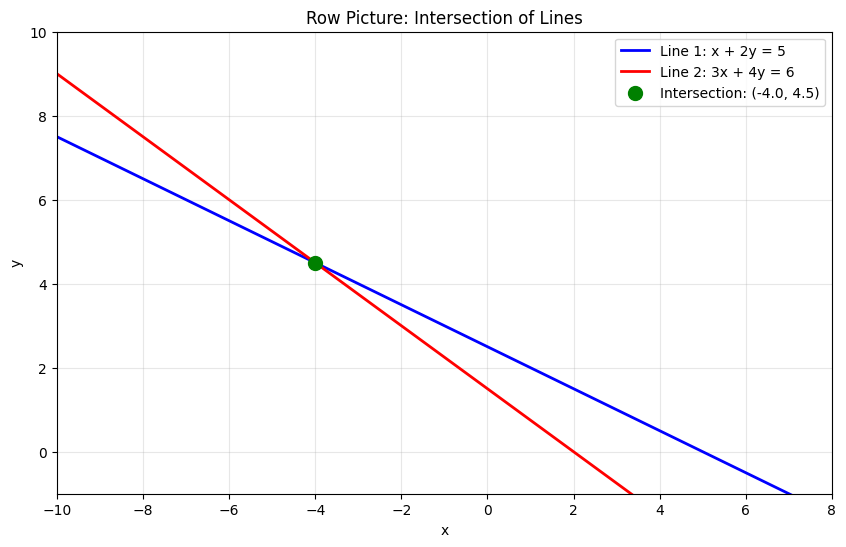

Solution: x = -4.000, y = 4.500
Verification: [5. 6.] = [5 6]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the equations in the form y = mx + c
# Line 1: x + 2y = 5  =>  y = -1/2*x + 5/2
# Line 2: 3x + 4y = 6  =>  y = -3/4*x + 3/2
x = np.linspace(-10, 10, 100)
y1 = -1/2 * x + 5/2
y2 = -3/4 * x + 3/2

# Solve for intersection point
A = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])
solution = np.linalg.solve(A, b)

# Plot both lines and intersection
plt.figure(figsize=(10, 6))
plt.plot(x, y1, 'b-', label='Line 1: x + 2y = 5', linewidth=2)
plt.plot(x, y2, 'r-', label='Line 2: 3x + 4y = 6', linewidth=2)
plt.scatter(solution[0], solution[1], color='green', s=100, zorder=5, 
           label=f'Intersection: ({solution[0]:.1f}, {solution[1]:.1f})')

plt.xlim(-10, 8)
plt.ylim(-1, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Row Picture: Intersection of Lines')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Solution: x = {solution[0]:.3f}, y = {solution[1]:.3f}")
print(f"Verification: {A @ solution} = {b}")

## Exercise 2: Column Picture

Express the same system in column form and visualize the linear combination:
$$x \begin{bmatrix}1 \\ 3\end{bmatrix} + y \begin{bmatrix}2 \\ 4\end{bmatrix} = \begin{bmatrix}5 \\ 6\end{bmatrix}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define column vectors and target vector
a1 = np.array([1, 3])
a2 = np.array([2, 4])
b = np.array([5, 6])

# Solve for coefficients
A = np.column_stack([a1, a2])
solution = np.linalg.solve(A, b)
x, y = solution[0], solution[1]

print(f"Linear combination: {x:.3f} * a1 + {y:.3f} * a2 = b")
print(f"Coefficients: x = {x:.3f}, y = {y:.3f}")
print(f"x*a1 = {x*a1}")
print(f"y*a2 = {y*a2}")

# Visualize the step-by-step construction (only showing scaled vectors)
plt.figure(figsize=(14, 10))

# Step 1: Draw x*a1 (scaled version) - THE FIRST STEP
plt.arrow(0, 0, x*a1[0], x*a1[1], head_width=0.25, head_length=0.25, 
         fc='darkblue', ec='darkblue', linewidth=5,
         label=f'Step 1: {x:.2f} × a₁ = [{x*a1[0]:.1f}, {x*a1[1]:.1f}]')

# Mark the endpoint of x*a1 clearly with a large dot
plt.scatter(x*a1[0], x*a1[1], color='darkblue', s=200, zorder=5, 
           edgecolor='white', linewidth=3)

# Step 2: Draw y*a2 starting from the tip of x*a1
plt.arrow(x*a1[0], x*a1[1], y*a2[0], y*a2[1], head_width=0.25, head_length=0.25, 
         fc='darkgreen', ec='darkgreen', linewidth=5,
         label=f'Step 2: + {y:.2f} × a₂ = + [{y*a2[0]:.1f}, {y*a2[1]:.1f}]')

# Show final result vector b
plt.arrow(0, 0, b[0], b[1], head_width=0.3, head_length=0.3, 
         fc='red', ec='red', linewidth=6, alpha=0.8,
         label=f'Result: b = [{b[0]}, {b[1]}]')

# Add text annotations directly on the plot for clarity
plt.text(x*a1[0]/2 - 0.8, x*a1[1]/2 - 0.5, f'{x:.1f}×a₁', fontsize=18, fontweight='bold', 
         color='darkblue', bbox=dict(boxstyle="round,pad=0.4", facecolor='lightblue', alpha=0.9))

plt.text(x*a1[0] + y*a2[0]/2 + 0.3, x*a1[1] + y*a2[1]/2 + 0.3, f'{y:.1f}×a₂', 
         fontsize=18, fontweight='bold', color='darkgreen', 
         bbox=dict(boxstyle="round,pad=0.4", facecolor='lightgreen', alpha=0.9))

plt.text(b[0]/2 + 0.5, b[1]/2 + 0.5, 'b', fontsize=20, fontweight='bold', 
         color='red', bbox=dict(boxstyle="round,pad=0.4", facecolor='yellow', alpha=0.9))

# Add construction lines with different styles
plt.plot([0, x*a1[0]], [0, x*a1[1]], 'b--', alpha=0.6, linewidth=3)
plt.plot([x*a1[0], b[0]], [x*a1[1], b[1]], 'g--', alpha=0.6, linewidth=3)

# Add grid and labels
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Dynamic limits with extra padding
all_x = [0, x*a1[0], x*a1[0] + y*a2[0], b[0]]
all_y = [0, x*a1[1], x*a1[1] + y*a2[1], b[1]]
margin = 1.5
plt.xlim(min(all_x) - margin, max(all_x) + margin)
plt.ylim(min(all_y) - margin, max(all_y) + margin)

plt.xlabel('x-component', fontsize=16, fontweight='bold')
plt.ylabel('y-component', fontsize=16, fontweight='bold')
plt.title('Column Picture: Vector Addition Construction\n{:.2f}⋅a₁ + {:.2f}⋅a₂ = b'.format(x, y), fontsize=18, fontweight='bold')

# Create a cleaner legend with only the essential vectors
plt.legend(fontsize=14, framealpha=0.9, loc='upper left')

plt.tight_layout()
plt.show()

# Show the step-by-step calculation with clearer formatting
print(f"\\n" + "="*60)
print(f"🔍 STEP-BY-STEP VECTOR CONSTRUCTION")
print(f"="*60)
print(f"Target equation: x⋅a₁ + y⋅a₂ = b")
print(f"Where: a₁ = {a1}, a₂ = {a2}, b = {b}")
print(f"\\nSolution: x = {x:.3f}, y = {y:.3f}")
print(f"\\n📐 Construction steps:")
print(f"  1️⃣  Start at origin (0, 0)")
print(f"  2️⃣  Go to x⋅a₁ = {x:.3f} × {a1} = {x*a1}")
print(f"  3️⃣  From there, add y⋅a₂ = {y:.3f} × {a2} = {y*a2}")
print(f"  4️⃣  Final position: {x*a1} + {y*a2} = {x*a1 + y*a2}")
print(f"\\n✅ Result matches target: {np.allclose(x*a1 + y*a2, b)}")
print(f"="*60)

## Exercise 3: System Types

Create examples of systems with:
- (a) Unique solution
- (b) No solution  
- (c) Infinitely many solutions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Case (a): Unique solution - non-parallel columns
print("Case (a) - Unique solution:")
A_a = np.array([[1, 2], [3, 4]])
b_a = np.array([5, 6])
solution_a = np.linalg.solve(A_a, b_a)
print(f"Solution: {solution_a}")

# Case (b): No solution - parallel columns, b not in span
print("\nCase (b) - No solution:")
A_b = np.array([[1, 2], [2, 4]])  # Columns are parallel
b_b = np.array([5, 6])            # b not in span
try:
    solution_b = np.linalg.solve(A_b, b_b)
    print(f"Solution: {solution_b}")
except np.linalg.LinAlgError as e:
    print(f"No solution: {e}")

# Case (c): Infinitely many solutions - parallel columns, b in span
print("\nCase (c) - Infinitely many solutions:")
A_c = np.array([[1, 2], [2, 4]])  # Same parallel columns
b_c = np.array([3, 6])            # b = 3 * [1, 2], so b is in span
try:
    solution_c = np.linalg.solve(A_c, b_c)
    print(f"One solution: {solution_c}")
except np.linalg.LinAlgError as e:
    print(f"Infinite solutions (singular matrix): {e}")
    # Find one particular solution using pseudoinverse
    solution_c = np.linalg.pinv(A_c) @ b_c
    print(f"Particular solution: {solution_c}")

# Visualize all three cases with correct understanding
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Case (a): Unique solution - SIMPLE AND CLEAN
ax = axes[0]

# Check if vectors are linearly independent
det_A_a = np.linalg.det(A_a)
print(f"\nCase (a): det(A) = {det_A_a:.3f} ≠ 0 → linearly independent")
print("→ Column space = ENTIRE 2D plane (R²)")

# Since vectors are linearly independent, they span the entire 2D plane
ax.fill_between([-1, 6], [-1, -1], [7, 7], color='lightblue', alpha=0.2, 
                label='Column space = ALL of R² (entire plane)')

# Add text to emphasize this
ax.text(2, 0.5, 'Column space = ENTIRE 2D plane\n(any point can be reached)', 
        fontsize=12, fontweight='bold', ha='center',
        bbox=dict(boxstyle="round,pad=0.4", facecolor='lightblue', alpha=0.8))

# Draw ONLY the essential vectors: a₁, a₂, and b
ax.arrow(0, 0, A_a[0,0], A_a[1,0], head_width=0.15, head_length=0.15,
         fc='blue', ec='blue', linewidth=3, alpha=0.9, label='a₁ = [1,3]')
ax.arrow(0, 0, A_a[0,1], A_a[1,1], head_width=0.15, head_length=0.15,
         fc='green', ec='green', linewidth=3, alpha=0.9, label='a₂ = [2,4]')
ax.arrow(0, 0, b_a[0], b_a[1], head_width=0.2, head_length=0.2,
         fc='red', ec='red', linewidth=4, label='b = [5,6] (target)')

ax.set_title('(a) Linearly Independent Vectors\nColumn space = ENTIRE plane', fontsize=12, fontweight='bold')
ax.legend(fontsize=10, loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 7)

# Case (b): No solution - LINEARLY DEPENDENT VECTORS
ax = axes[1]
det_A_b = np.linalg.det(A_b)
print(f"Case (b): det(A) = {det_A_b:.3f} = 0 → linearly dependent")
print("→ Column space = 1D line only")

# Show the span line (1D subspace)
t = np.linspace(-2, 5, 100)
span_x, span_y = t * A_b[0,0], t * A_b[1,0]
ax.plot(span_x, span_y, 'lightblue', linewidth=8, alpha=0.6, 
        label='Column space (1D line only)')

# Draw basis vectors
ax.arrow(0, 0, A_b[0,0], A_b[1,0], head_width=0.15, head_length=0.15, 
         fc='blue', ec='blue', linewidth=3, label='a₁ = [1,2]')
ax.arrow(0, 0, A_b[0,1], A_b[1,1], head_width=0.15, head_length=0.15, 
         fc='green', ec='green', linewidth=3, label='a₂ = [2,4] = 2×a₁')

# Target vector that's NOT in span
ax.arrow(0, 0, b_b[0], b_b[1], head_width=0.2, head_length=0.2, 
         fc='red', ec='red', linewidth=4, label='b = [5,6]')

# Add clear annotation showing the limitation
ax.text(1, 5, 'Column space is\nONLY this blue line!\n(Most points unreachable)', 
        fontsize=11, fontweight='bold', ha='center',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='pink', alpha=0.8))

ax.set_title('(b) Linearly Dependent Vectors\nColumn space = 1D line only', fontsize=12, fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 7)

# Case (c): Infinitely many solutions - SAME 1D LIMITATION
ax = axes[2]
print(f"Case (c): det(A) = {np.linalg.det(A_c):.3f} = 0 → linearly dependent")
print("→ Column space = same 1D line")

# Show the span line (1D subspace)
t = np.linspace(-1, 4, 100)
span_x, span_y = t * A_c[0,0], t * A_c[1,0]
ax.plot(span_x, span_y, 'lightblue', linewidth=8, alpha=0.6,
        label='Column space (1D line only)')

# Draw basis vectors
ax.arrow(0, 0, A_c[0,0], A_c[1,0], head_width=0.15, head_length=0.15, 
         fc='blue', ec='blue', linewidth=3, label='a₁ = [1,2]')
ax.arrow(0, 0, A_c[0,1], A_c[1,1], head_width=0.15, head_length=0.15, 
         fc='green', ec='green', linewidth=3, label='a₂ = [2,4] = 2×a₁')

# Target vector that IS in span
ax.arrow(0, 0, b_c[0], b_c[1], head_width=0.2, head_length=0.2, 
         fc='red', ec='red', linewidth=4, label='b = [3,6]')

# Show multiple different combinations that reach b
ax.arrow(0, 0, 3*A_c[0,0], 3*A_c[1,0], head_width=0.1, head_length=0.1,
         fc='purple', ec='purple', alpha=0.8, linewidth=2, label='3×a₁ + 0×a₂')
ax.arrow(0, 0, 1*A_c[0,0], 1*A_c[1,0], head_width=0.1, head_length=0.1,
         fc='orange', ec='orange', alpha=0.8, linewidth=2, label='1×a₁ + 1×a₂')
ax.arrow(1*A_c[0,0], 1*A_c[1,0], 1*A_c[0,1], 1*A_c[1,1], head_width=0.1, head_length=0.1,
         fc='orange', ec='orange', alpha=0.8, linewidth=2)

ax.text(1, 4.5, 'b happens to lie\nON the blue line!', 
        fontsize=11, fontweight='bold', ha='center',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.8))

ax.set_title('(c) Linearly Dependent Vectors\nb happens to be on the line', fontsize=12, fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 7)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("🔍 KEY INSIGHT: The column space depends on linear independence!")
print("="*60)
print("• LINEARLY INDEPENDENT vectors (det ≠ 0):")
print("  → Column space = ENTIRE 2D plane (any point reachable)")
print("  → Every b has exactly one solution")
print("\n• LINEARLY DEPENDENT vectors (det = 0):")
print("  → Column space = 1D line only (most points unreachable)")
print("  → Only b vectors ON the line have solutions")
print("  → If solution exists, there are infinitely many")
print("="*60)